In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_path = "drive/My Drive/"
!ls "drive/My Drive/"


Mounted at /content/drive
images	       step0_1.ipynb  step2.ipynb  videos
step0_0.ipynb  step1.ipynb    step3.ipynb


building1.jpg


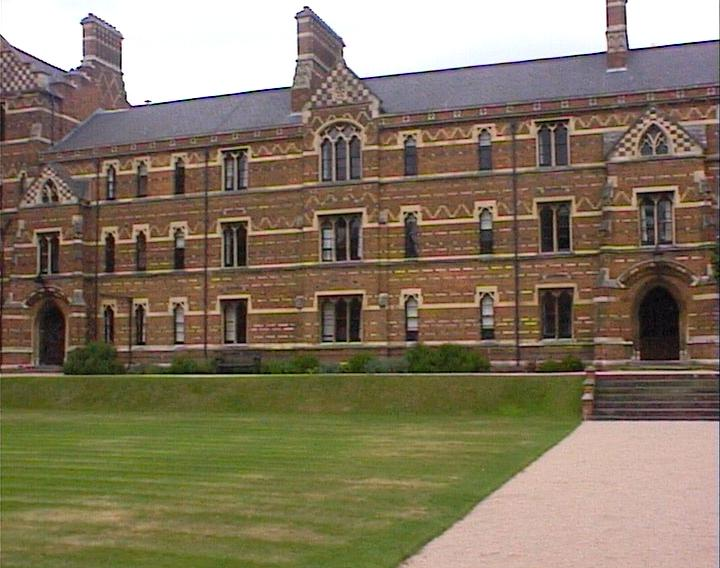

building2.jpg


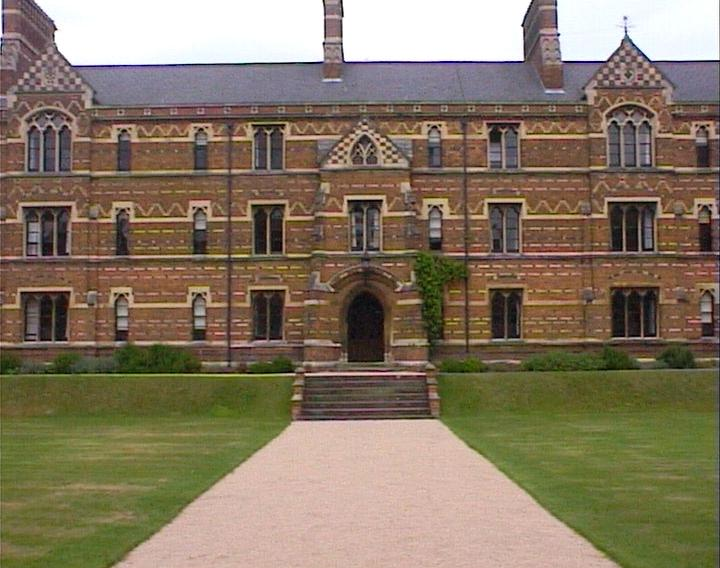

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


img1 = cv2.imread(data_path+'images/building1.jpg')
img2 = cv2.imread(data_path+'images/building2.jpg')

print('building1.jpg')
cv2_imshow(img1)
print('building2.jpg')
cv2_imshow(img2)

img1


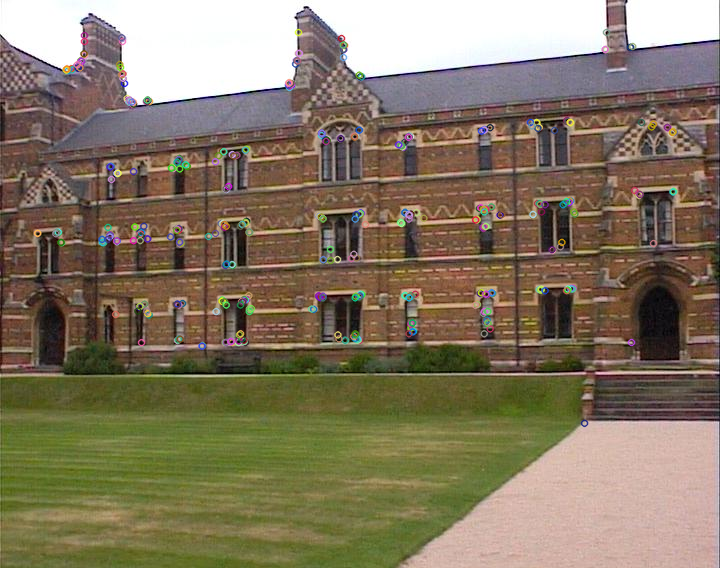

img2


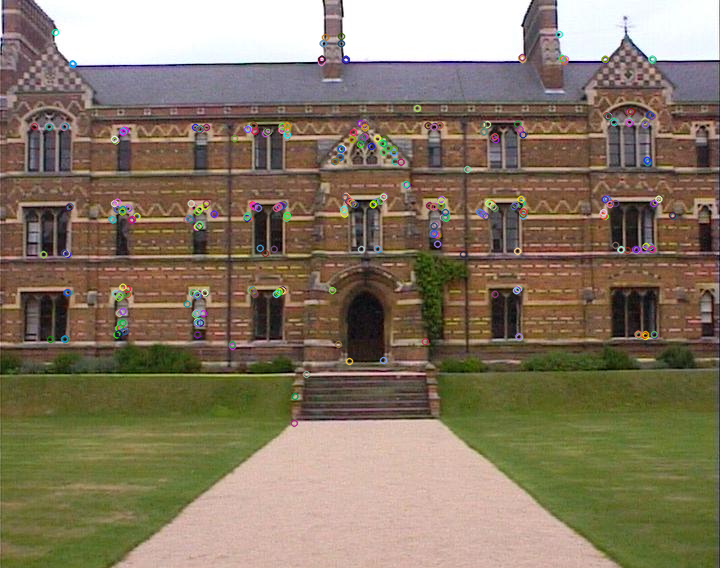

In [3]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

tmp_img1=cv2.drawKeypoints(img1,kp1,None)
print('img1')
cv2_imshow(tmp_img1)

tmp_img2=cv2.drawKeypoints(img2,kp2,None)
print('img2')
cv2_imshow(tmp_img2)

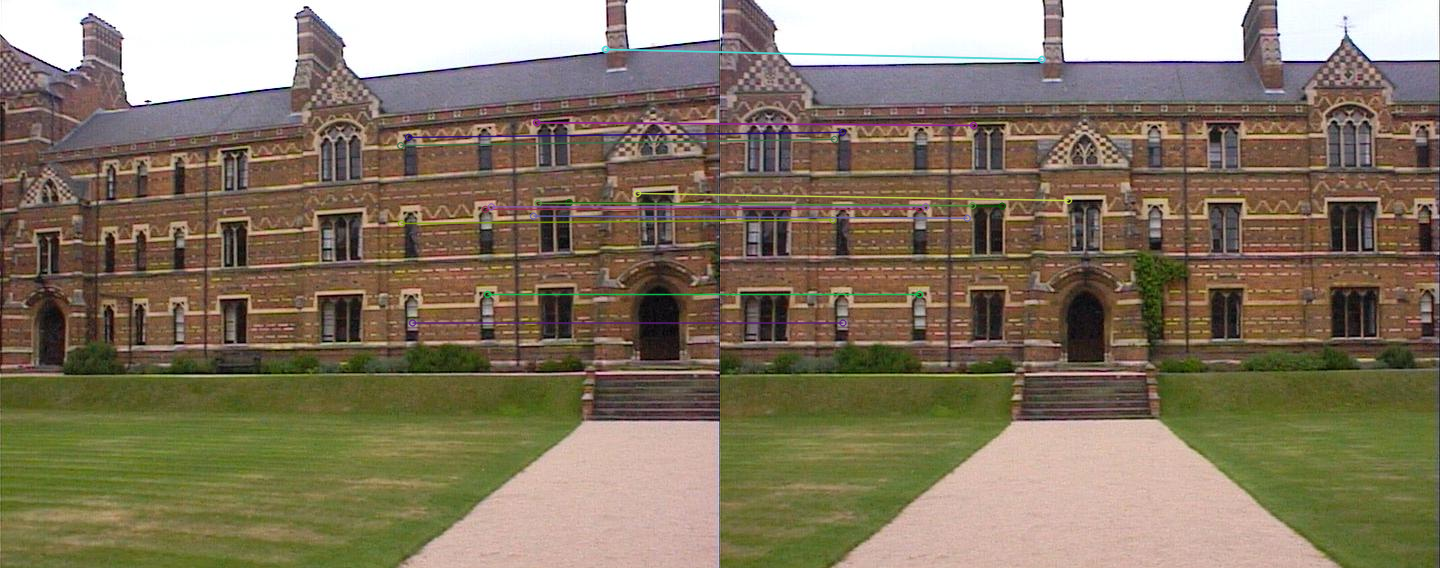

In [6]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
final = cv2.drawMatches(img1,kp1,img2,kp2,matches[:15],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(final)

In [7]:
def findHomography(image_1_kp, image_2_kp, matches):
    image_1_points = np.zeros((len(matches), 1, 2), dtype=np.float32)
    image_2_points = np.zeros((len(matches), 1, 2), dtype=np.float32)

    for i in range(0,len(matches)):
        image_1_points[i] = image_1_kp[matches[i].queryIdx].pt
        image_2_points[i] = image_2_kp[matches[i].trainIdx].pt


    homography, mask = cv2.findHomography(image_1_points, image_2_points, cv2.RANSAC, ransacReprojThreshold=2.0)

    return homography


homography_matrix = findHomography(kp1,kp2,matches[:20])

print('homography_matrix:')
print(homography_matrix)

homography_matrix:
[[ 1.21384102e+00 -2.50037557e-02 -3.54562631e+02]
 [ 1.12095426e-01  1.16158956e+00 -5.73917316e+01]
 [ 2.89947107e-04  3.22594286e-05  1.00000000e+00]]


In [8]:
def MyHomography(points1,points2):

    points1 = np.column_stack((points1,np.ones(points1.shape[0]))).T
    points2 = np.column_stack((points2,np.ones(points2.shape[0]))).T

    p1 = points1[:-1,:].T
    p2 = points2[:-1,:].T


    A_up = np.column_stack((p1,np.ones(p1.shape[0]),np.zeros((p1.shape[0],3)),-p1[:,0]*p2[:,0],-p1[:,1]*p2[:,0],-p2[:,0]))
    A_below = np.column_stack((np.zeros((p1.shape[0],3)),p1,np.ones(p1.shape[0]),-p1[:,0]*p2[:,1],-p1[:,1]*p2[:,1],-p2[:,1]))

    A = np.vstack((A_up,A_below))

    result = np.linalg.svd(A)[-1][-1]
    result = result/result[-1]
    result = result.reshape((p1.shape[1]+1,-1))
    return result

def findHomography_new(image_1_kp, image_2_kp, matches):
    image_1_points = np.zeros((len(matches), 2), dtype=np.float32)
    image_2_points = np.zeros((len(matches), 2), dtype=np.float32)

    for i in range(0,len(matches)):
        image_1_points[i] = image_1_kp[matches[i].queryIdx].pt
        image_2_points[i] = image_2_kp[matches[i].trainIdx].pt

    homography = MyHomography(image_1_points, image_2_points)

    return homography


homography_matrix = findHomography_new(kp1,kp2,matches[:20])

print('homography_matrix:')
print(homography_matrix)

homography_matrix:
[[ 1.21928686e+00 -2.97763263e-02 -3.55602704e+02]
 [ 1.16837366e-01  1.15516217e+00 -5.78998221e+01]
 [ 3.06038057e-04  5.97440383e-06  1.00000000e+00]]
